In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import plotly.express as px
import pandas as pd

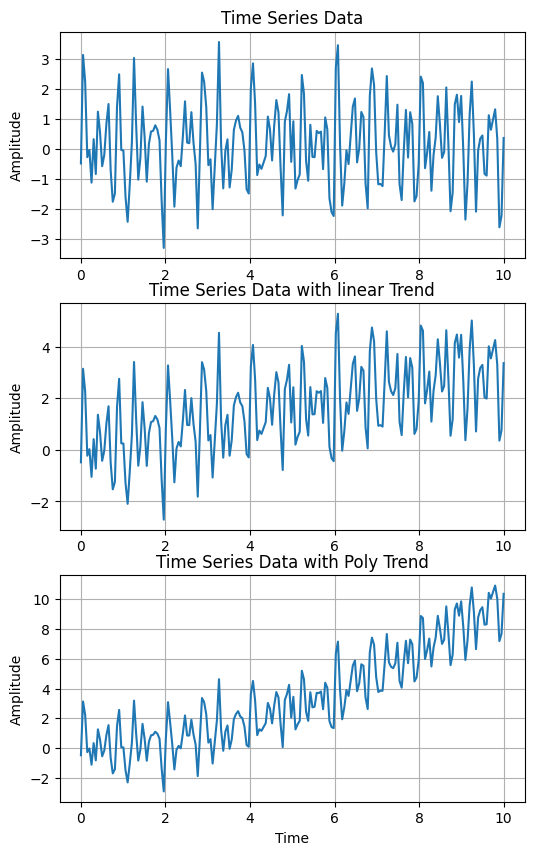

In [9]:
#define 3 sin() with several frquancies
f1=5  
f2=10
f3=7

# Generate a time series data with trend and noise
t = np.linspace(0, 10, 200)

#   sinus with freq f1 + sinus with freq f2 + sinus with freq f3 + add random noise +                
y = np.sin(f1*np.pi*t) + np.sin(f2*np.pi*t) + np.sin(f3*np.pi*t) + 2*np.random.normal(0.1, 0.3, len(t))                                   
y_trend = y + 0.3*t              #add liner trend to prev signal
y_trend_poly = y + 0.1*t**2      #add polynom trend

# Create two subplots for both signals
fig,(ax1,ax2,ax3)  = plt.subplots( 3 ,figsize=(6,10)) 
ax1.plot(t, y)
ax1.set_title('Time Series Data')
ax1.set(xlabel='', ylabel='Amplitude')
ax1.grid(True)
ax2.plot(t, y_trend)
ax2.set_title('Time Series Data with linear Trend')
ax2.set(xlabel='', ylabel='Amplitude')
ax2.grid(True)
ax3.plot(t, y_trend_poly)
ax3.set_title('Time Series Data with Poly Trend')
ax3.set(xlabel='Time', ylabel='Amplitude')
plt.grid(True)
plt.show()


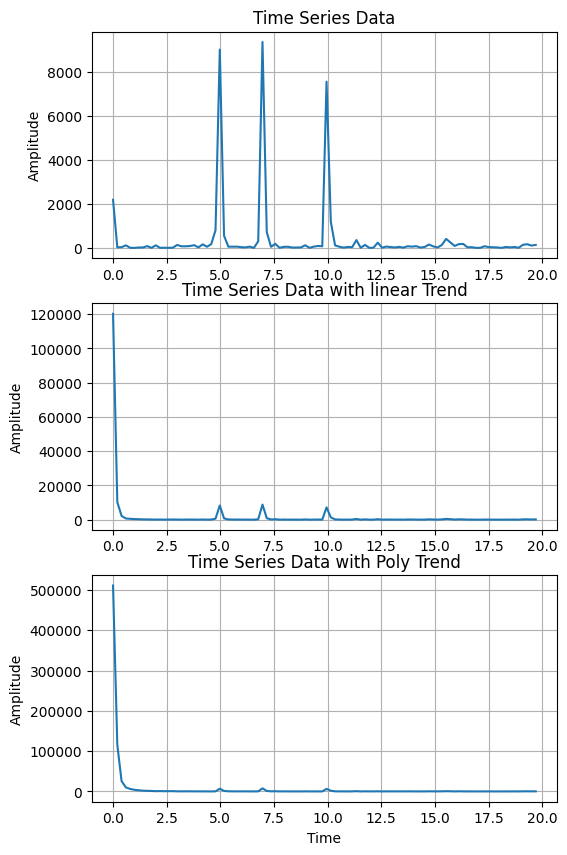

In [7]:
# Compute the FFT of the time series data
y_fft = np.fft.fft(y)
y_fft_trend  = np.fft.fft(y_trend)
y_fft_trend_poly  = np.fft.fft(y_trend_poly)
 
# Compute the power spectral density (PSD)
psd = np.abs(y_fft)**2
psd_trend = np.abs(y_fft_trend)**2
psd_trend_poly = np.abs(y_fft_trend_poly)**2

# shift the spectrum to the middle
yfft = np.fft.fftshift(psd, axes=None)
yfft_trend = np.fft.fftshift(psd_trend, axes=None)
yfft_trend_poly = np.fft.fftshift(psd_trend_poly, axes=None)
middle = int(len(yfft)/2)

# Compute the frequency vector
freq = np.fft.fftfreq(len(yfft), d=(t[1]-t[0])/2)
freq = freq[:int(len(y)/2)]


# Create two subplots for both signals
fig,(ax1,ax2,ax3)  = plt.subplots( 3 ,figsize=(6,10)) 
ax1.plot(freq, yfft[middle:])
ax1.set_title('Time Series Data')
ax1.set(xlabel='', ylabel='Amplitude')
ax1.grid(True)
ax2.plot(freq, yfft_trend[middle:])
ax2.set_title('Time Series Data with linear Trend')
ax2.set(xlabel='', ylabel='Amplitude')
ax2.grid(True)
ax3.plot(freq, yfft_trend_poly[middle:])
ax3.set_title('Time Series Data with Poly Trend')
ax3.set(xlabel='Time', ylabel='Amplitude')
plt.grid(True)
plt.show()

In [ ]:
# Identify the peaks in the PSD to find the periodicity
tresh = 0.7 * np.mean(yfft)
peaks_index, properties = find_peaks( yfft[middle:], height=tresh)

# Print the identified peaks
print("Identified Peaks at Frequencies: (Hz) ", np.round(freq[peaks_index]))

Identified Peaks at Frequencies: (Hz)  [ 5.  7. 10.]


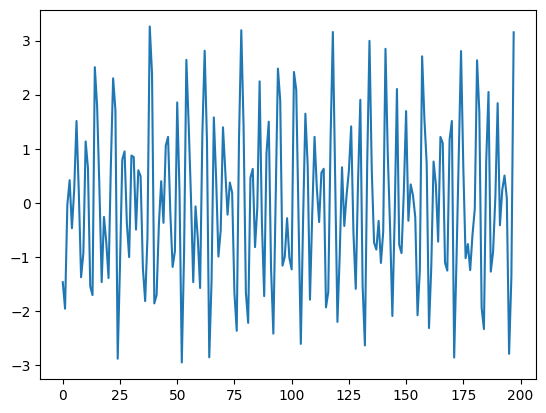

In [ ]:
no_trend_ar1 = [ y_trend[i+1] -y_trend[i] for i in range(1,len(y_trend)-1) ]
plt.plot(no_trend_ar1)
y = y_trend
y1 = no_trend_ar1 

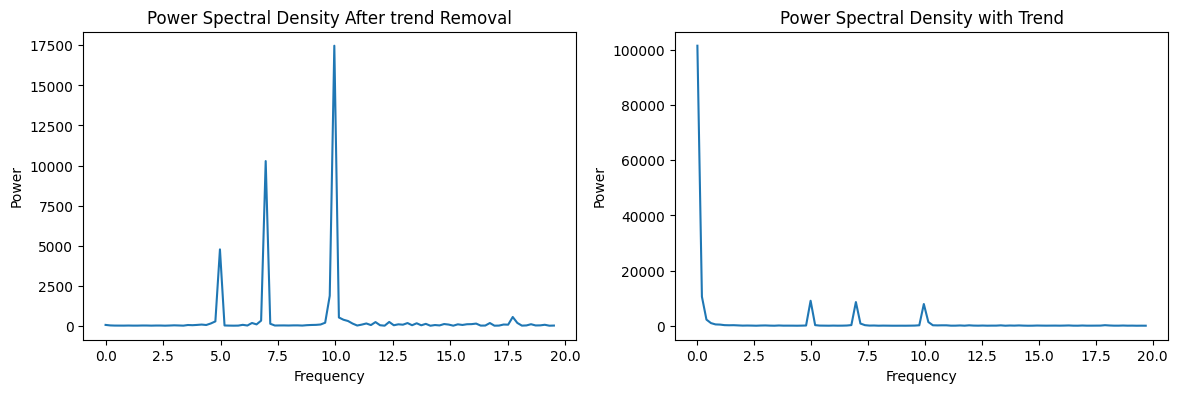

In [ ]:
# Compute the FFT of the time series data
y_fft = np.fft.fft(y)
y_fft_ar = np.fft.fft(y1)

# Compute the power spectral density (PSD)
psd = np.abs(y_fft)**2
psd_ar = np.abs(y_fft_ar)**2

# shift the spectrum to the middle
yfft = np.fft.fftshift(psd, axes=None)
yfft_ar = np.fft.fftshift(psd_ar, axes=None)
middle = int(len(yfft)/2)
middle_ar = int(len(yfft_ar)/2)

# Compute the frequency vector
freq = np.fft.fftfreq(len(yfft), d=(t[1]-t[0])/2)
freq = freq[:int(len(yfft)/2)]
freq_ar = np.fft.fftfreq(len(yfft_ar), d=(t[1]-t[0])/2)
freq_ar = freq[:int(len(yfft_ar)/2)]

# Create two subplots for both signals
fig, (ax1, ax2) = plt.subplots( 1, 2 ,figsize=(14,4)) 
ax1.plot(freq_ar, yfft_ar[middle_ar:])
ax1.set_title('Power Spectral Density After trend Removal')
ax1.set(xlabel='Frequency', ylabel='Power')
ax2.plot(freq, yfft_trend[middle:])
ax2.set_title('Power Spectral Density with Trend')
ax2.set(xlabel='Frequency', ylabel='Power')
plt.show()


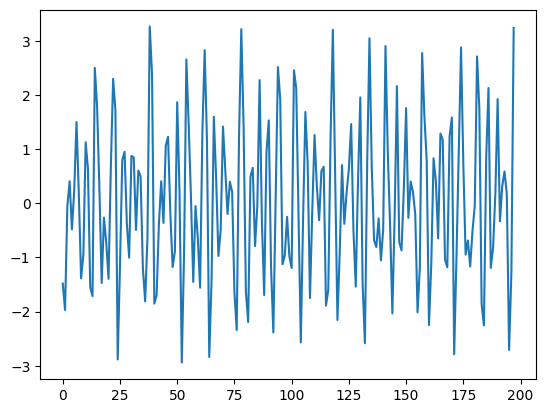

In [ ]:
no_trend_ar1_poly = [ y_trend_poly[i+1] -y_trend_poly[i] for i in range(1,len(y_trend_poly)-1) ]
plt.plot(no_trend_ar1_poly)
y = y_trend_poly
y1 = no_trend_ar1_poly 

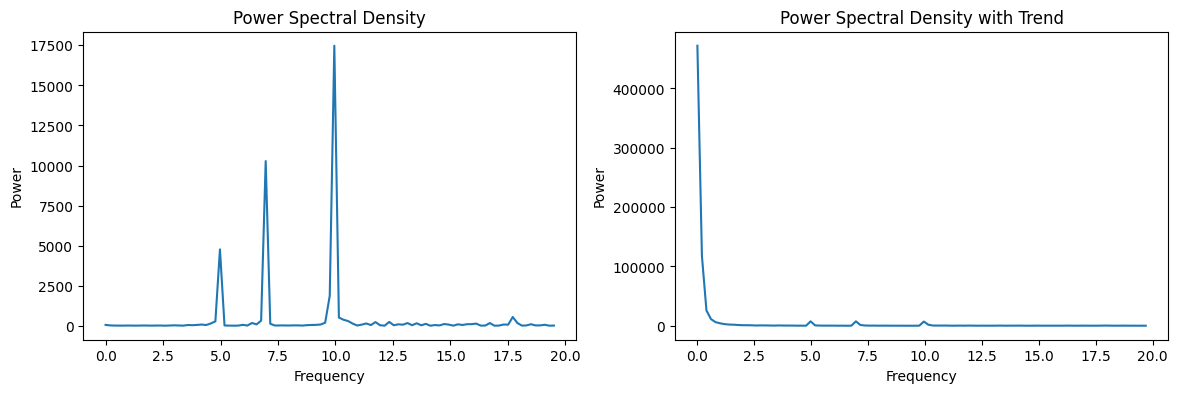

In [ ]:
# Compute the FFT of the time series data
y_fft = np.fft.fft(y_trend_poly)
y_fft_ar = np.fft.fft(y1)

# Compute the power spectral density (PSD)
psd = np.abs(y_fft)**2
psd_ar = np.abs(y_fft_ar)**2

# shift the spectrum to the middle
yfft = np.fft.fftshift(psd, axes=None)
yfft_ar = np.fft.fftshift(psd_ar, axes=None)
middle = int(len(yfft)/2)
middle_ar = int(len(yfft_ar)/2)

# Compute the frequency vector
freq = np.fft.fftfreq(len(yfft), d=(t[1]-t[0])/2)
freq = freq[:int(len(yfft)/2)]
freq_ar = np.fft.fftfreq(len(yfft_ar), d=(t[1]-t[0])/2)
freq_ar = freq[:int(len(yfft_ar)/2)]

# Create two subplots for both signals
fig, (ax1, ax2) = plt.subplots( 1, 2 ,figsize=(14,4)) 
ax1.plot(freq_ar, yfft_ar[middle_ar:])
ax1.set_title('Power Spectral Density')
ax1.set(xlabel='Frequency', ylabel='Power')
ax2.plot(freq, yfft[middle:])
ax2.set_title('Power Spectral Density with Trend')
ax2.set(xlabel='Frequency', ylabel='Power')
plt.show()


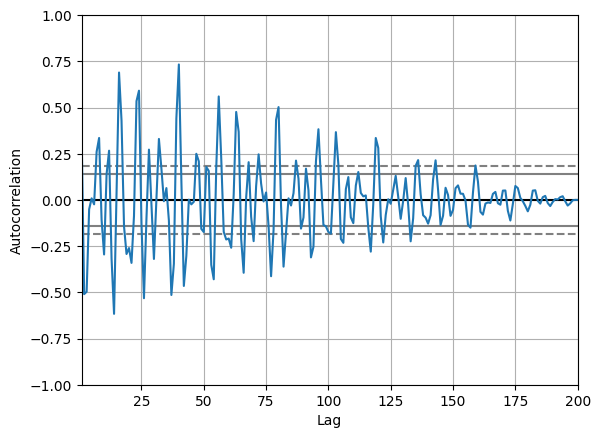

In [ ]:
from pandas.plotting import autocorrelation_plot
acorr = autocorrelation_plot(y)

#Real Signal

In [ ]:
df = pd.read_csv('/content/AirPassengers.csv')
df['#Passengers'] = np.log( df['#Passengers'])
df.head()

,Month,#Passengers
0,1949-01,4.718499
1,1949-02,4.770685
2,1949-03,4.882802
3,1949-04,4.859812
4,1949-05,4.795791


In [ ]:
figure = px.line(df, x='Month' , y ='#Passengers' , title ='Passengers')
figure.show()

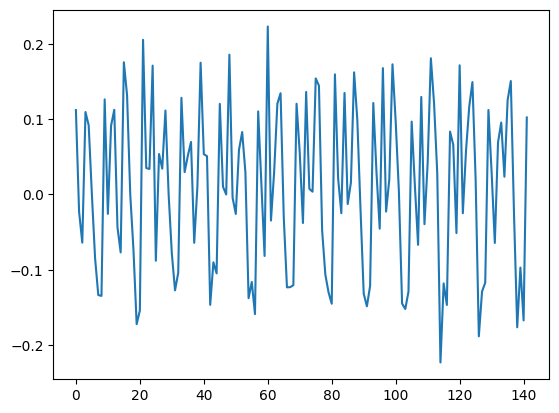

In [ ]:
no_trend_df_ar1 = [ df['#Passengers'][i+1] -df['#Passengers'][i] for i in range(1,len(df)-1) ]
plt.plot(no_trend_df_ar1)

In [ ]:
length = len(no_trend_df_ar1)
t = [i for i in range(0,length)]
y1 = no_trend_df_ar1
y = df['#Passengers']

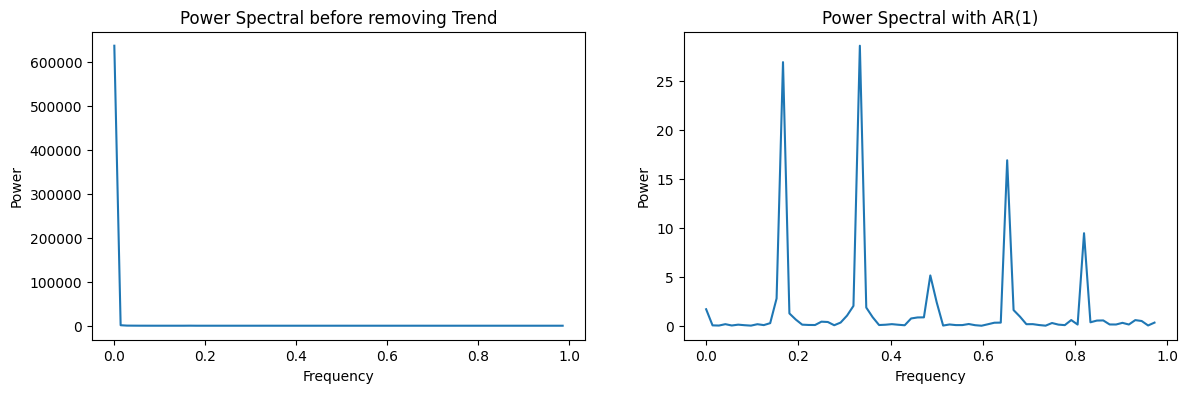

In [ ]:
# Compute the FFT of the time series data
y_fft = np.fft.fft(y)
y_fft_ar = np.fft.fft(y1)

# Compute the power spectral density (PSD)
psd = np.abs(y_fft)**2
psd_ar = np.abs(y_fft_ar)**2

# shift the spectrum to the middle
yfft = np.fft.fftshift(psd, axes=None)
yfft_ar = np.fft.fftshift(psd_ar, axes=None)
middle = int(len(yfft)/2)
middle_ar = int(len(yfft_ar)/2)

# Compute the frequency vector
freq = np.fft.fftfreq(len(yfft), d=(t[1]-t[0])/2)
freq = freq[:int(len(yfft)/2)]
freq_ar = np.fft.fftfreq(len(yfft_ar), d=(t[1]-t[0])/2)
freq_ar = freq[:int(len(yfft_ar)/2)]

# Create two subplots for both signals
fig, (ax1, ax2) = plt.subplots( 1, 2 ,figsize=(14,4)) 
ax1.plot(freq, yfft[middle:])
ax1.set_title('Power Spectral before removing Trend')
ax1.set(xlabel='Frequency', ylabel='Power')
ax2.plot(freq_ar, yfft_ar[middle_ar:])
ax2.set_title('Power Spectral with AR(1)')
ax2.set(xlabel='Frequency', ylabel='Power')
plt.show()


In [ ]:
# Identify the peaks in the PSD to find the periodicity
tresh =  0.7*np.mean(yfft_ar)
peaks_index, properties = find_peaks( yfft_ar[middle_ar:], height=tresh)

# Print the identified peaks
print("Identified Peaks at Frequencies: ", properties)
print("Identified Peaks at T (1/f):     ", np.round((1/(freq[peaks_index]/2))))

Identified Peaks at Frequencies:  {'peak_heights': array([26.89620371, 28.57139783,  5.13337146, 16.88397204,  9.44233981])}
Identified Peaks at T (1/f):      [12.  6.  4.  3.  2.]


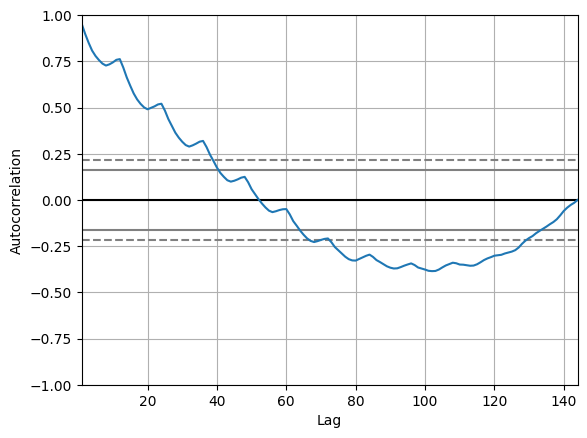

In [ ]:
from pandas.plotting import autocorrelation_plot
acorr = autocorrelation_plot(df['#Passengers'])